In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
path = "/content/drive/MyDrive/New Project Datasets/uber-raw-data-sep14.csv"
df = pd.read_csv(path)
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


Checking for data cleaning and preprocessing

In [52]:
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [53]:
df.duplicated().value_counts() # Not removing duplicates as there might be a possibility of events occuring at the same time at the same place

False    1004099
True       24037
dtype: int64

In [54]:
df['Date/Time'] = df['Date/Time'].map(pd.to_datetime)

Now preparing the dataset which can be analysed according to days and hours for better insights

In [55]:
df['Day'] = df['Date/Time'].apply(lambda x :x.day)
df['Weekday'] = df['Date/Time'].apply(lambda x :x.weekday())
df['hour'] = df['Date/Time'].apply(lambda x :x.hour)
df.head()

,Date/Time,Lat,Lon,Base,Day,Weekday,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


In [56]:
cols = ['Day','Weekday','hour'] # checking the number unique values present in the new columns made if they are correct or not
for i in cols:
  print(df[i].nunique())

30
7
24


Now that the dataset is prepared according days and hours, analysing the trips for the given month of September - looking at each day to see on which day the Uber trips were highest: 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



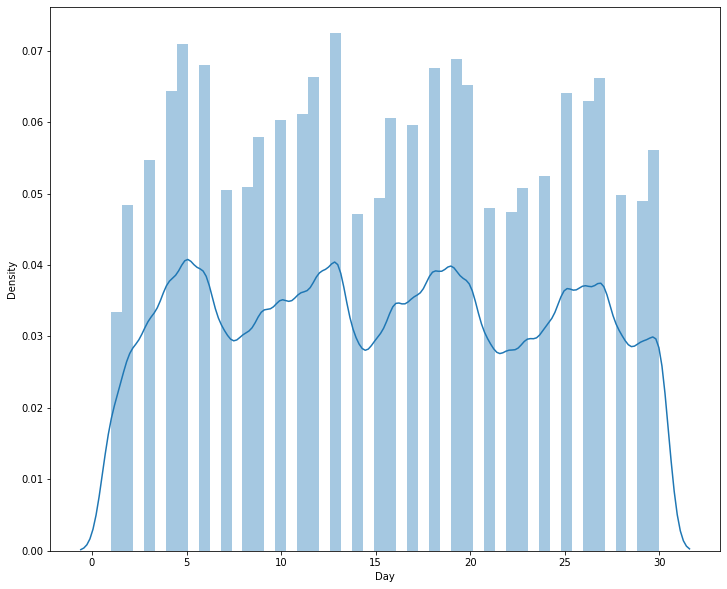

In [57]:
plt.figure(figsize=(12,10))
sns.distplot(df['Day'])
plt.show()

**By looking at the daily trips we can say that the Uber trips are rising on the working days and decreases on the weekends**

Now analysing the Uber trips according to the hours:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



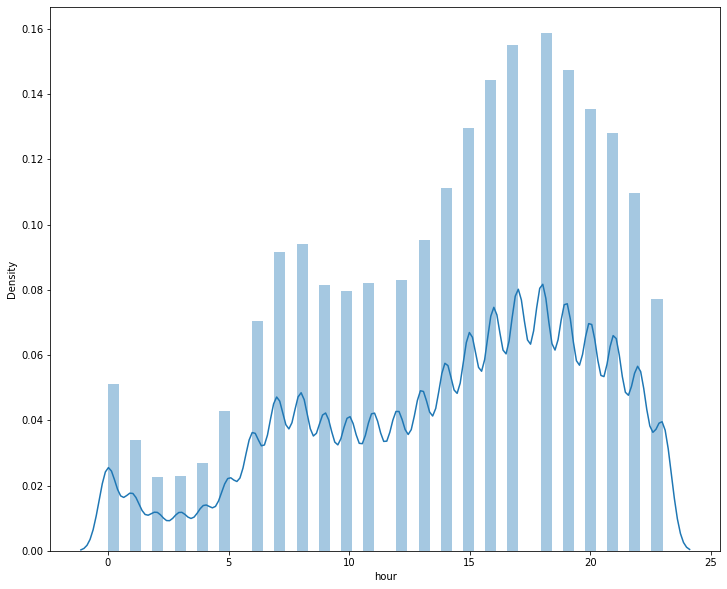

In [58]:
plt.figure(figsize=(12,10))
sns.distplot(df['hour'])

**According to the hourly data, the Uber trips decreases after midnight and then start increasing after 5 am and the trips keep rising till 6 pm such that 6 pm is the busiest hour for Uber then the trips start decreasing.**

Now analysing the Uber trips according to the weekdays:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



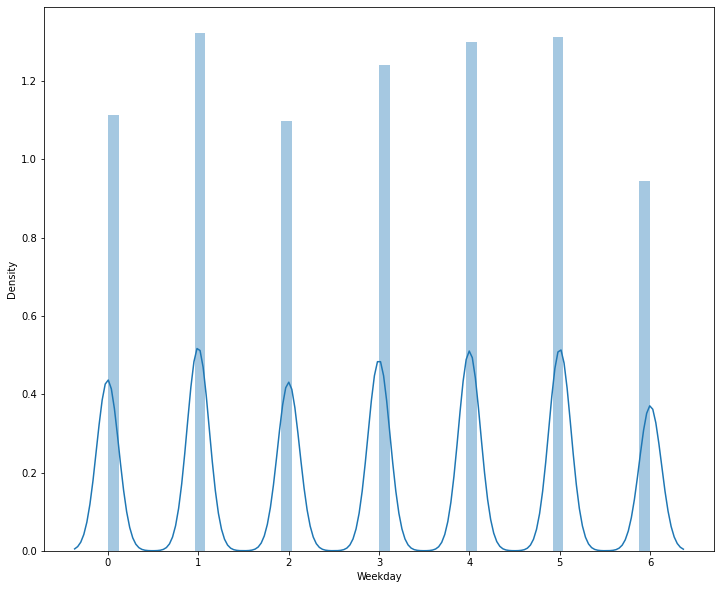

In [59]:
plt.figure(figsize=(12,10))
sns.distplot(df['Weekday'])

**In the above figure 0 indicates Sunday, on Sundays the Uber trips and more than Saturdays so we can say people also use Uber for outings rather than for just going to work. On Saturdays, the Uber trips are the lowest and on Mondays, they are the highest.**

Now analysing the correlation between hours and weekly data to get a deeper insight

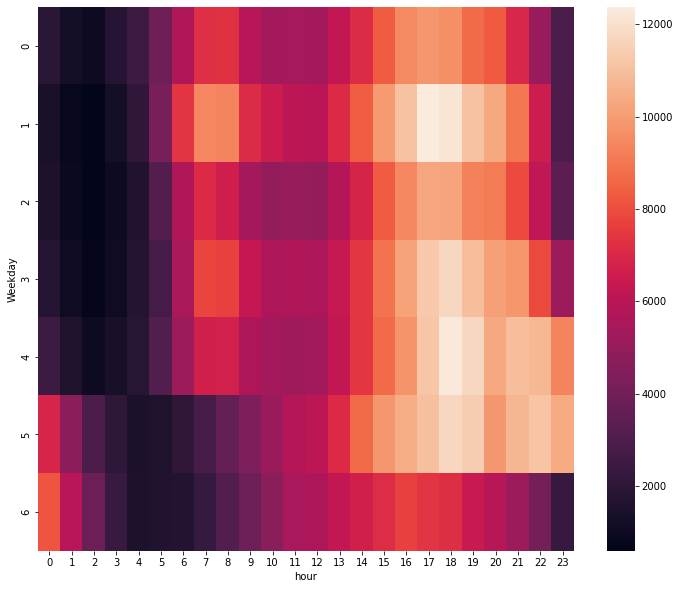

In [60]:
df1 = df.groupby(["Weekday", "hour"]).apply(lambda x: len(x))
df1 = df1.unstack()
plt.figure(figsize=(12,10))
sns.heatmap(df1, annot=False)

As we are having the data about longitude and latitude so we can also plot the density of Uber trips according to the regions of the New Your city:

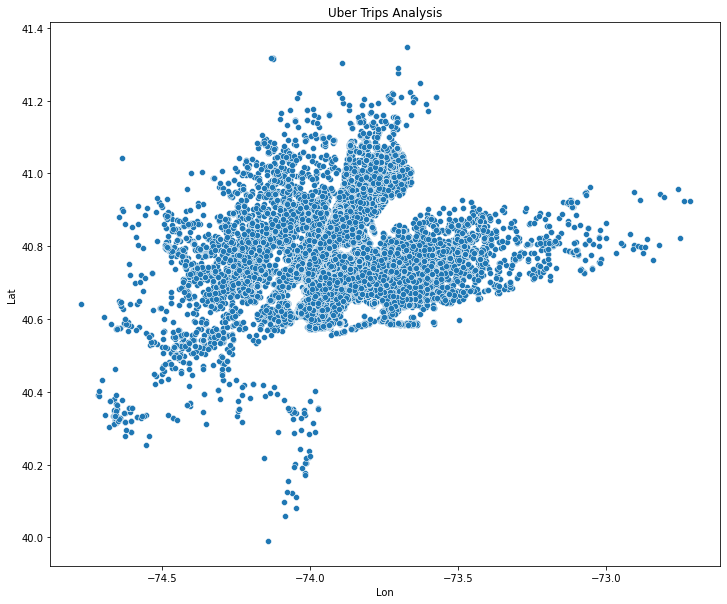

In [61]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x='Lon', y='Lat')
plt.title("Uber Trips Analysis")
plt.show()

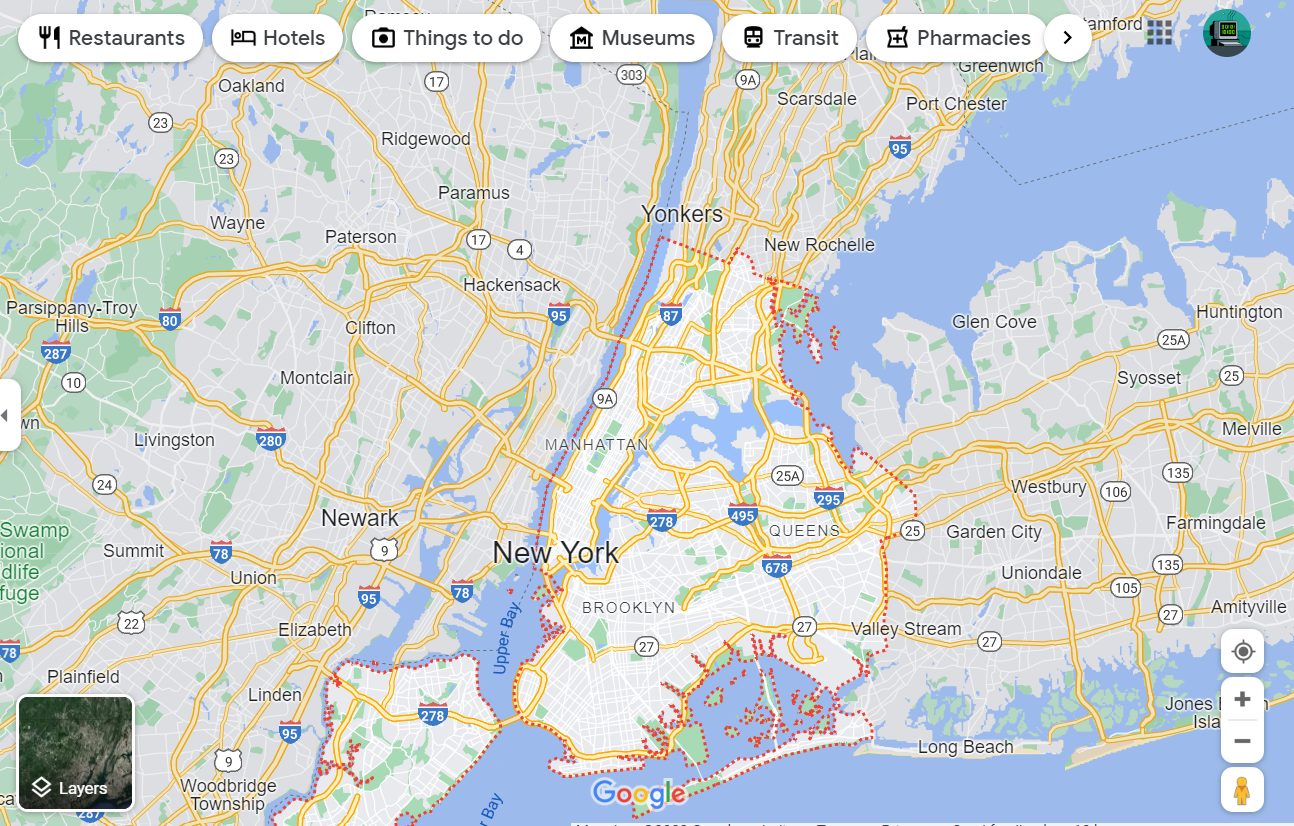

# Summary

So this is how we can analyze the Uber trips for New York City. Some of the conclusions that I got from this analysis are:

1. Monday is the most profitable day for Uber
2. On Saturdays less number of people use Uber
3. 6 pm is the busiest day for Uber
4. On average a rise in Uber trips start around 5 am.
5. Most of the Uber trips originate near the Manhattan region in New York.